<a href="https://colab.research.google.com/github/ROYALKINGISK/ML-LAB/blob/main/ML_LAB2_BL_EN_U4CSE21070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#A1
import pandas as pd
import numpy as np
df=pd.read_excel("19CSE305_LabData_Set3.1.xlsx",sheet_name="thyroid0387_UCI")
for column in df.columns:
    attribute_name = column
    attribute_data = df[column]

    # Determine the data type
    data_type = None

    # Check for nominal data (categorical data with no order)
    if attribute_data.dtype == 'object':
        data_type = 'Nominal'

    # Check for ordinal data (categorical data with a specific order)
    # You may need domain-specific knowledge to identify ordinal attributes
    # Example: if attribute_name == 'Education', you might consider it ordinal.

    # Check for numerical data (continuous or discrete)
    elif pd.api.types.is_numeric_dtype(attribute_data):
        data_type = 'Numerical'

    # Print the results
    print(f'Attribute: {attribute_name}, Data Type: {data_type}')



Attribute: Record ID, Data Type: Numerical
Attribute: age, Data Type: Numerical
Attribute: sex, Data Type: Nominal
Attribute: on thyroxine, Data Type: Nominal
Attribute: query on thyroxine, Data Type: Nominal
Attribute: on antithyroid medication, Data Type: Nominal
Attribute: sick, Data Type: Nominal
Attribute: pregnant, Data Type: Nominal
Attribute: thyroid surgery, Data Type: Nominal
Attribute: I131 treatment, Data Type: Nominal
Attribute: query hypothyroid, Data Type: Nominal
Attribute: query hyperthyroid, Data Type: Nominal
Attribute: lithium, Data Type: Nominal
Attribute: goitre, Data Type: Nominal
Attribute: tumor, Data Type: Nominal
Attribute: hypopituitary, Data Type: Nominal
Attribute: psych, Data Type: Nominal
Attribute: TSH measured, Data Type: Nominal
Attribute: TSH, Data Type: Nominal
Attribute: T3 measured, Data Type: Nominal
Attribute: T3, Data Type: Nominal
Attribute: TT4 measured, Data Type: Nominal
Attribute: TT4, Data Type: Nominal
Attribute: T4U measured, Data Type:

In [10]:
# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform encoding
for column in categorical_columns:
    if df[column].nunique() <= 2:
        # Use label encoding for binary variables
        df[column] = df[column].astype('category').cat.codes
    else:
        # Use one-hot encoding for nominal variables
        df = pd.get_dummies(df, columns=[column], prefix=[column])

# Now, 'df' contains encoded categorical attributes

In [11]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate basic statistics for numeric variables
summary_stats = numeric_columns.describe()

# Print the statistics
print(summary_stats)


          Record ID          age  on thyroxine  query on thyroxine  \
count  1.000000e+03  1000.000000   1000.000000         1000.000000   
mean   8.409340e+08    51.509000      0.155000            0.024000   
std    7.628734e+04    18.776541      0.362086            0.153126   
min    8.408010e+08     1.000000      0.000000            0.000000   
25%    8.409031e+08    35.000000      0.000000            0.000000   
50%    8.409210e+08    55.000000      0.000000            0.000000   
75%    8.410111e+08    67.000000      0.000000            0.000000   
max    8.410310e+08    97.000000      1.000000            1.000000   

       on antithyroid medication        sick     pregnant  thyroid surgery  \
count                1000.000000  1000.00000  1000.000000      1000.000000   
mean                    0.014000     0.02900     0.014000         0.022000   
std                     0.117549     0.16789     0.117549         0.146757   
min                     0.000000     0.00000     0.000000

In [12]:
missing_values = df.isnull().sum()
print(df.isnull().sum())

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({
    'Attribute': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Print or display the missing data summary
print(missing_data)


Record ID                    0
age                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
                            ..
Condition_O                  0
Condition_P                  0
Condition_Q                  0
Condition_R                  0
Condition_S                  0
Length: 759, dtype: int64
                                           Attribute  Missing Values  \
Record ID                                  Record ID               0   
age                                              age               0   
on thyroxine                            on thyroxine               0   
query on thyroxine                query on thyroxine               0   
on antithyroid medication  on antithyroid medication               0   
...                                              ...             ...   
Condition_O                              Condition_O               0   
Condition_P                              Condition_P     

In [14]:


# Detect and print outliers using the IQR method (Interquartile Range) for all columns
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and print the outliers for the current column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    if not outliers.empty:
        print(f'Outliers in {column}:')
        print(outliers)
    else:
        print(f'No outliers found in {column}')


Streaming output truncated to the last 5000 lines.
57     1
85     1
108    1
121    1
159    1
171    1
172    1
206    1
228    1
273    1
418    1
500    1
601    1
685    1
782    1
788    1
790    1
795    1
805    1
817    1
822    1
846    1
859    1
879    1
880    1
915    1
918    1
945    1
969    1
970    1
982    1
988    1
Name: T3_1.3, dtype: uint8
Outliers in T3_1.4:
42     1
111    1
113    1
116    1
122    1
139    1
161    1
201    1
225    1
249    1
263    1
266    1
279    1
281    1
305    1
321    1
322    1
330    1
378    1
453    1
514    1
592    1
683    1
689    1
700    1
719    1
722    1
729    1
735    1
768    1
792    1
860    1
910    1
930    1
953    1
983    1
Name: T3_1.4, dtype: uint8
Outliers in T3_1.5:
47     1
58     1
62     1
124    1
153    1
156    1
163    1
243    1
256    1
307    1
324    1
344    1
356    1
409    1
440    1
450    1
502    1
533    1
536    1
545    1
577    1
594    1
698    1
712    1
720    1
738    1
767    1


In [16]:
#A2
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

# Create a copy of the dataset to store filled values
filled_data = df.copy()

# Fill missing values for numeric columns
for column in numeric_columns:
    if column in df.columns:
        if df[column].isnull().sum() > 0:
            if column not in categorical_columns:
                # Check for outliers (you can customize this part)
                Q1 = df[column].quantile(0.25)
                Q3 = df[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                has_outliers = any((df[column] < lower_bound) | (df[column] > upper_bound))

                if not has_outliers:
                    # Use mean for columns without outliers
                    imputer = SimpleImputer(strategy='mean')
                    filled_data[column] = imputer.fit_transform(df[[column]])
                else:
                    # Use median for columns with outliers
                    imputer = SimpleImputer(strategy='median')
                    filled_data[column] = imputer.fit_transform(df[[column]])

# Fill missing values for categorical columns with mode
for column in categorical_columns:
    if column in df.columns:
        if df[column].isnull().sum() > 0:
            mode_value = df[column].mode()[0]
            filled_data[column].fillna(mode_value, inplace=True)

# Save the filled dataset to a new file
filled_data.to_csv('filled_dataset_ml.csv', index=False)


In [20]:
#A3
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler object
scaler = MinMaxScaler()

# Specify the columns to be normalized (replace 'columns_to_normalize' with your column names)
columns_to_normalize = ['age', 'sick']

# Apply Min-Max scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Specify the columns to be standardized (replace 'columns_to_standardize' with your column names)
columns_to_standardize = ['pregnant', 'tumor']

# Apply Z-score standardization to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


In [22]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Specify the columns to be scaled (replace 'columns_to_scale' with your column names)
columns_to_scale = ['goitre', 'psych']

# Apply Robust scaling to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [27]:
#A4
from sklearn.metrics import jaccard_score, pairwise_distances

# Extract the two binary vectors from the DataFrame
vector1 = np.round(df.iloc[0, 1:])  # Assuming the first row contains the first vector
vector2 = np.round(df.iloc[1, 1:])
# Calculate the Jaccard Coefficient (JC)
jc = jaccard_score(vector1, vector2, average='binary')

# Calculate the Simple Matching Coefficient (SMC)
vectors_matrix = np.array([vector1, vector2])
hamming_distances = pairwise_distances(vectors_matrix, metric='hamming')
smc = 1 - hamming_distances[0, 1]

# Print the results
print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")


Jaccard Coefficient (JC): 0.4375
Simple Matching Coefficient (SMC): 0.9881266490765171


In [29]:
#A5
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define two document vectors (replace these with your actual vectors)
vector1 = np.array(df.iloc[0, 1:])  # Assuming the first row contains the first vector
vector2 = np.array(df.iloc[1, 1:])

# Reshape the vectors to 2D arrays
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)

# Calculate the Cosine Similarity between the vectors using the second feature
cosine_sim = cosine_similarity(vector1[:, 1:], vector2[:, 1:])

# Print the Cosine Similarity value
print(f"Cosine Similarity between the vectors: {cosine_sim[0][0]}")


Cosine Similarity between the vectors: 0.6106555256012693


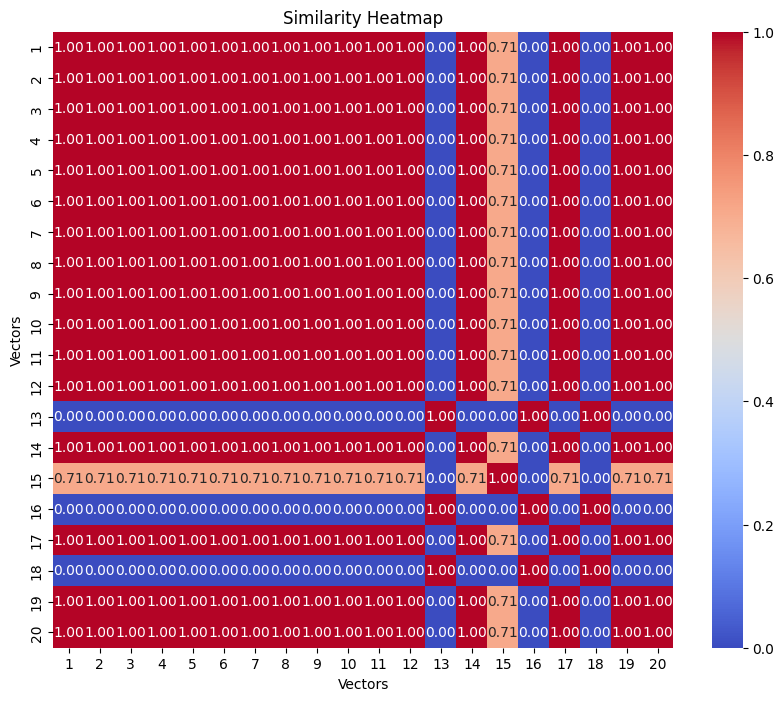

In [39]:
#A6
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the first 20 observation vectors
subset_df = df.iloc[:20, :]

# Extract the binary attributes (replace 'binary_columns' with your binary columns)
binary_columns = ['tumor', 'sex_M', 'sex_F']

# Create an empty matrix to store the similarity scores
num_vectors = len(subset_df)
similarity_matrix = np.zeros((num_vectors, num_vectors))

# Calculate JC, SMC, and COS between pairs of vectors
for i in range(num_vectors):
    for j in range(num_vectors):
        vector1 = np.array(subset_df.iloc[i][binary_columns])
        vector2 = np.array(subset_df.iloc[j][binary_columns])
        # Thresholding example
        threshold = 0.5
        vector1 = (vector1 > threshold).astype(int)
        vector2 = (vector2 > threshold).astype(int)

        # Calculate JC (Jaccard Coefficient)
        jc = jaccard_score(vector1, vector2, average='binary')

        # Calculate SMC (Simple Matching Coefficient)
        hamming_distance = pairwise_distances([vector1, vector2], metric='hamming')
        smc = 1 - hamming_distance[0, 1]

        # Calculate COS (Cosine Similarity)
        cos_sim = cosine_similarity([vector1], [vector2])[0][0]

        # Store the similarity scores in the matrix
        similarity_matrix[i, j] = cos_sim  # You can replace this with jc or smc if needed

# Create a heatmap plot to visualize the similarities
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=range(1, num_vectors+1), yticklabels=range(1, num_vectors+1))
plt.title('Similarity Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.show()
